In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
# same thing as the other file but using seaborn instead of matplotlib

top_richest = pd.read_csv('top_100_richest.csv', index_col='rank')
country_stats = pd.read_csv('wiki_number_of_billionaires.csv')
ages = top_richest[['name', 'age']]

In [8]:
# taking a look at the datasets that one is working with

top_richest.head()

,name,net_worth,bday,age,nationality
rank,,,,,
1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [10]:
country_stats.head()

,country,num_billionares,billionaire_per_million
0,World,"2,668",0.350
1,United States,735,1.853
2,Mainland China,539,0.276
3,India,166,0.101
4,Germany,134,1.553


<AxesSubplot:xlabel='name', ylabel='age'>

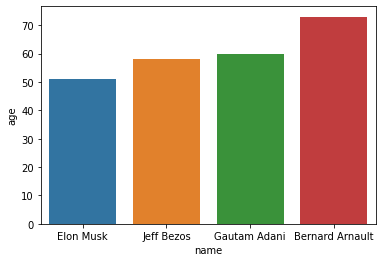

In [6]:
# bar graph of the top 5 wealthies from the dataset comparing their ages

sns.barplot(data=ages.iloc[:4], x='name', y='age')

<AxesSubplot:xlabel='name', ylabel='age'>

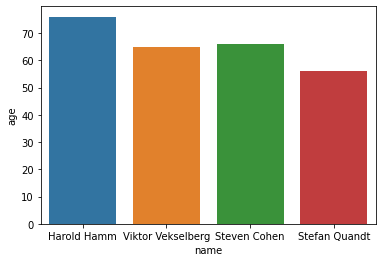

In [7]:
# bar graph of the 4 lowest on the list comparing their ages

sns.barplot(data=ages.iloc[-4:], x='name', y='age')

In [5]:
# finding the range of ages, by turning it into a list and finding the minimum and maximum ages

age_counts = ages.value_counts('age').to_dict()
l = ages['age'].tolist()
min(l), max(l)

(36.0, 97.0)

In [25]:
# creating a function that will create groupings of age ranges

def make_range(beg_num, num_ranges):
    bg = beg_num
    nr = num_ranges
    groupings = []
    for x in range(nr):
        grp = range(bg, bg+9)
        bg += 10
        groupings.append(list(grp))
    return groupings

In [29]:
richest_age_ranges = make_range(30, 7)

In [41]:
# creating a function that will record the number of instances of each age range from the dataset

def age_groups_counts(df, col_name, age_ranges):
    df_col = df[col_name].tolist()
    age_group_counts = []
    for x in age_ranges:
        lowest = min(x)
        highest = max(x)
        r = range(lowest, highest)
        age_group = 0
        for y in df_col:
            if y in r:
                age_group += 1
                df_col.remove(y)
                next
            else:
                next
        age_group_counts.append(age_group)
        next
    return age_group_counts

In [81]:
# utilizing functions created above to make a bar graph illustrating the age ranges of the dataset

richest_age_group_counts = age_groups_counts(top_richest, 'age', richest_age_ranges)

graph_groupings_names = {'30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0}
for i, x in enumerate(graph_groupings_names):
    graph_groupings_names[x] = richest_age_group_counts[i]
    
graph_groupings_names

{'30s': 2, '40s': 2, '50s': 14, '60s': 16, '70s': 16, '80s': 9, '90s': 6}

In [94]:
grp_ages = pd.DataFrame(graph_groupings_names.values(), graph_groupings_names.keys())
grp_ages = grp_ages.reset_index()
grp_ages.columns = ['age_range', 'count']
grp_ages

,age_range,count
0,30s,2
1,40s,2
2,50s,14
3,60s,16
4,70s,16
5,80s,9
6,90s,6


<AxesSubplot:xlabel='age_range', ylabel='count'>

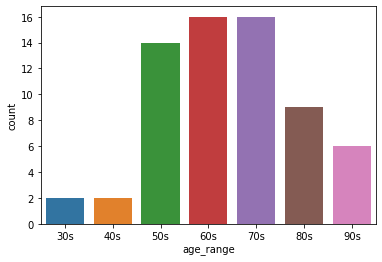

In [95]:
sns.barplot(data=grp_ages, x=grp_ages['age_range'], y=grp_ages['count'])